In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

## Read data

In [2]:
validated = pd.read_csv('csv/validated_alerts.csv')
validated

,id,status,status_desc,alert_geometry_id,alert_code,source,detected_year,detected_at,area_ha,biome_id,...,ppa_area_ha,river_source_count,def_asv,def_asv_area,def_pmfs,def_pmfs_area,has_embargoed,before_date,after_date,alert_car_days_interval
0,38,593769,published,137239,38,{SAD},2019,1/1/2019,3.8847,18413,...,NaN,0,0,NaN,0,NaN,NaN,11/2/2018,4/10/2019,159.0
1,39,593770,published,137240,39,"{SAD,SIPAM-SAR}",2019,1/1/2019,19.0475,18413,...,NaN,0,0,NaN,0,NaN,15.0,10/1/2018,7/10/2019,281.0
2,40,593771,published,172560,40,"{DETERB-AMAZONIA,SAD}",2019,1/1/2019,6.6145,18413,...,NaN,0,0,NaN,0,NaN,72.0,10/8/2018,1/19/2019,102.0
3,43,593772,published,137242,43,"{DETERB-AMAZONIA,GLAD,SAD}",2019,1/1/2019,29.8646,18413,...,NaN,0,0,NaN,0,NaN,180.0,10/18/2018,8/19/2019,305.0
4,44,593773,published,175831,44,"{DETERB-AMAZONIA,GLAD,SAD}",2019,1/1/2019,8.0784,18413,...,1.34195,0,0,NaN,0,NaN,15.0,7/24/2019,10/30/2019,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133199,305324,1728514,published,449323,305246,{SIRADX},2021,1/1/2021,0.8624,18413,...,NaN,0,0,NaN,0,NaN,NaN,10/2/2020,10/18/2020,16.0
133200,305327,1719839,published,448231,305249,{SIRADX},2021,1/1/2021,0.9964,18413,...,NaN,0,0,NaN,0,NaN,4.0,8/9/2020,12/22/2020,134.0
133201,305328,1874029,published,503687,305250,{SIRADX},2021,1/1/2021,1.1268,18413,...,NaN,0,0,NaN,0,NaN,7.0,9/29/2020,2/4/2021,128.0
133202,305330,1728515,published,449328,305252,{SIRADX},2021,1/1/2021,1.1154,18413,...,NaN,0,0,NaN,0,NaN,4.0,10/10/2020,12/12/2020,62.0


In [3]:
validated.columns

Index(['id', 'status', 'status_desc', 'alert_geometry_id', 'alert_code',
       'source', 'detected_year', 'detected_at', 'area_ha', 'biome_id',
       'biome', 'state_id', 'state', 'city_id', 'city',
       ' Sem_cruza_areas_protegidas_por_lei ', ' UC_sem_APA ', 'Esta_em_APA',
       'conservation_unit_id', 'conservation_unit', 'conservation_unit_area',
       'indigenous_land_id', 'indigenous_land', 'indigenous_land_area',
       'quilombo_id', 'quilombo', 'quilombo_area', 'settlement_id',
       'settlement', 'settlement_area', 'level_1_basin_id', 'level_1_basin',
       'level_2_basin_id', 'level_2_basin', 'car_count',
       'legal_reserves_count', 'legal_reserves_area_ha', 'ppa_count',
       'ppa_area_ha', 'river_source_count', 'def_asv', 'def_asv_area',
       'def_pmfs', 'def_pmfs_area', 'has_embargoed', 'before_date',
       'after_date', 'alert_car_days_interval'],
      dtype='object')

### Filter year and sources

In [4]:
validated = validated[validated['detected_year'].isin([2019, 2020])]
validated = validated[~validated['source'].isin(['{IEF-MG}', '{INEMA-BA}'])]
validated

,id,status,status_desc,alert_geometry_id,alert_code,source,detected_year,detected_at,area_ha,biome_id,...,ppa_area_ha,river_source_count,def_asv,def_asv_area,def_pmfs,def_pmfs_area,has_embargoed,before_date,after_date,alert_car_days_interval
0,38,593769,published,137239,38,{SAD},2019,1/1/2019,3.8847,18413,...,NaN,0,0,NaN,0,NaN,NaN,11/2/2018,4/10/2019,159.0
1,39,593770,published,137240,39,"{SAD,SIPAM-SAR}",2019,1/1/2019,19.0475,18413,...,NaN,0,0,NaN,0,NaN,15.0,10/1/2018,7/10/2019,281.0
2,40,593771,published,172560,40,"{DETERB-AMAZONIA,SAD}",2019,1/1/2019,6.6145,18413,...,NaN,0,0,NaN,0,NaN,72.0,10/8/2018,1/19/2019,102.0
3,43,593772,published,137242,43,"{DETERB-AMAZONIA,GLAD,SAD}",2019,1/1/2019,29.8646,18413,...,NaN,0,0,NaN,0,NaN,180.0,10/18/2018,8/19/2019,305.0
4,44,593773,published,175831,44,"{DETERB-AMAZONIA,GLAD,SAD}",2019,1/1/2019,8.0784,18413,...,1.34195,0,0,NaN,0,NaN,15.0,7/24/2019,10/30/2019,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133163,305222,1729776,published,451457,305144,{SIRADX},2020,12/1/2020,4.1633,18413,...,NaN,0,0,NaN,0,NaN,5.0,10/2/2020,10/19/2020,17.0
133164,305223,1728486,published,449301,305145,{SIRADX},2020,12/1/2020,0.9227,18413,...,NaN,0,0,NaN,0,NaN,5.0,7/9/2020,2/6/2021,211.0
133165,305224,1728487,published,448850,305146,{SIRADX},2020,12/1/2020,0.2603,18413,...,NaN,0,0,NaN,0,NaN,5.0,7/15/2020,11/12/2020,120.0
133166,305228,1729777,published,451456,305150,{SIRADX},2020,12/1/2020,2.0379,18413,...,NaN,0,0,NaN,0,NaN,5.0,9/12/2020,12/27/2020,105.0


### Pretify columns and values

In [5]:
# Columns
validated = validated.rename(columns={
    'biome': 'Biome',
    'source': 'Alert source',
    'detected_year': 'Detection year',
    'area_ha': 'Area (ha)',
    'city': 'Municipality',
    'state': 'County',
})

# Values
validated['Biome'] = validated['Biome'].replace(to_replace={
    'AMAZÔNIA': 'Amazon',
    'CAATINGA': 'Caatinga',
    'CERRADO': 'Cerrado',
    'MATA ATLÂNTICA': 'Atlantic Forest',
    'PAMPA': 'Pampa',
    'PANTANAL': 'Pantanal',
})

## Biomes

### Number of alerts

In [7]:
df = validated.groupby(['Biome', 'Detection year']).size().reset_index(name='counts')
df_pivot = pd.pivot_table(df, values='counts', index=['Biome'], columns=['Detection year'], fill_value='0', margins=True, aggfunc= 'sum').astype(int)
df_pivot

Detection year,2019,2020,All
Biome,,,
Amazon,47389,58946,106335
Atlantic Forest,1395,3051,4446
Caatinga,527,4272,4799
Cerrado,7409,7624,15033
Pampa,68,106,174
Pantanal,215,198,413
All,57003,74197,131200


### Deforested area

In [8]:
df = validated.groupby(['Biome', 'Detection year'])['Area (ha)'].sum().reset_index(name='Area (ha)')
df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome'], columns=['Detection year'], fill_value='0', margins=True, aggfunc= 'sum').astype(int)
df_pivot

Detection year,2019,2020,All
Biome,,,
Amazon,770451,842982,1613434
Atlantic Forest,10598,23805,34404
Caatinga,12153,61373,73526
Cerrado,408647,432146,840793
Pampa,642,1279,1921
Pantanal,16521,23651,40173
All,1219015,1385238,2604253


### Average size of deforestation

In [9]:
df = validated.groupby(['Biome', 'Detection year'])['Area (ha)'].mean().reset_index(name='Area (ha)')
df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome'], fill_value='0', margins=True, aggfunc= 'mean').astype(int)
df_pivot

,Area (ha)
Biome,
Amazon,15
Atlantic Forest,7
Caatinga,18
Cerrado,55
Pampa,10
Pantanal,98
All,34


### Largest size of deforestation

In [6]:
df = validated.groupby(['Biome'])['Area (ha)', 'Municipality', 'County', 'Detection year'].max().reset_index()
df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome', 'Municipality', 'County', 'Detection year'], fill_value='0', aggfunc= 'max').astype(int).reset_index()
df_pivot

/tmp/ipykernel_642/982995483.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = validated.groupby(['Biome'])['Area (ha)', 'Municipality', 'County', 'Detection year'].max().reset_index()


,Biome,Municipality,County,Detection year,Area (ha)
0,Amazon,ÓBIDOS,TOCANTINS,2020,6468
1,Atlantic Forest,ÁGUIA BRANCA,SÃO PAULO,2020,276
2,Caatinga,ÉRICO CARDOSO,SERGIPE,2020,1050
3,Cerrado,ÁGUAS LINDAS DE GOIÁS,TOCANTINS,2020,5987
4,Pampa,VILA NOVA DO SUL,RIO GRANDE DO SUL,2020,125
5,Pantanal,SONORA,MATO GROSSO DO SUL,2020,4126


## Top-20 Municipalities

In [10]:
import matplotlib.pyplot as plt

c2 = 'Municipality'
df = validated.groupby(['Municipality','County'])['Area (ha)'].sum().reset_index(name='Area (ha)')
df.sort_values('Area (ha)',ascending=False)[0:20]

,Municipality,County,Area (ha)
57,ALTAMIRA,PARÁ,114765.8708
2530,SÃO FÉLIX DO XINGU,PARÁ,85266.9324
2097,PORTO VELHO,RONDÔNIA,79577.7293
1493,LÁBREA,AMAZONAS,68084.5433
1807,NOVO PROGRESSO,PARÁ,44537.3255
141,APUÍ,AMAZONAS,43784.7385
1235,ITAITUBA,PARÁ,41883.4345
242,BALSAS,MARANHÃO,37545.5025
700,COLNIZA,MATO GROSSO,36071.5415
1847,PACAJÁ,PARÁ,34188.7862


### Top-20 Conservation Unit

In [34]:
import matplotlib.pyplot as plt

mask = validated['conservation_unit_area'] > 0

c2 = 'conservation_unit'
df = validated.groupby(['conservation_unit'])['Area (ha)'].sum().reset_index(name='Area (ha)')
df.sort_values('Area (ha)',ascending=False)[0:20]

,conservation_unit,Area (ha)
49,APA Triunfo do Xingu,64709.0247
181,FLOREX Rio Preto-Jacundá,53119.9230
38,APA Rio Preto,22729.3318
156,FLONA do Jamanxim,20388.1022
325,RESEX Jaci Paraná,17270.2345
27,APA Leandro (Ilha do Bananal/Cantão),16872.0513
319,RESEX Chico Mendes,13581.0623
135,FLONA de Altamira,13245.6363
93,APA do Tapajós,12331.3285
53,APA da Bacia do Rio de Janeiro,11802.6947


### Top-20 Indigenous Land

In [35]:
import matplotlib.pyplot as plt

mask = validated['indigenous_land_area'] > 0

c2 = 'indigenous_land'
df = validated.groupby(['indigenous_land'])['Area (ha)'].sum().reset_index(name='Area (ha)')
df.sort_values('Area (ha)',ascending=False)[0:20]

,indigenous_land,Area (ha)
56,TI Apyterewa,16410.1122
87,TI Cachoeira Seca do Iriri,12381.4596
284,TI Trincheira/Bacajá,9071.6882
128,TI Ituna/Itatá,7956.1640
194,TI Mundurucu,3419.1038
161,TI Kayapó,3139.8709
147,TI Karipuna,2023.8464
60,TI Arara do Rio Branco,1357.4733
26,Menkragnoti,1348.2573
317,TI Yanomami,1198.8441


### Deforestation with full or partial overlap with Conservation Units (UC)

In [29]:
mask = validated['conservation_unit_area'] > 0
df = validated[mask].groupby(['Biome', 'Detection year'])['Area (ha)', 'Municipality', 'County'].agg({'Area (ha)': ['sum', 'count']}).reset_index()
df = df.rename(columns = {'sum': 'Area (ha)', 'count': 'Number of Alerts'})
df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome', 'Detection year'], fill_value='0', aggfunc= 'max').astype(int).reset_index()
df_pivot

/tmp/ipykernel_642/2283365075.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = validated[mask].groupby(['Biome', 'Detection year'])['Area (ha)', 'Municipality', 'County'].agg({'Area (ha)': ['sum', 'count']}).reset_index()
/tmp/ipykernel_642/2283365075.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome', 'Detection year'], fill_value='0', aggfunc= 'max').astype(int).reset_index()


,Biome,Detection year,Area (ha),Number of Alerts
0,Amazon,2019,131704,7125
1,Amazon,2020,140321,8865
2,Atlantic Forest,2019,834,127
3,Atlantic Forest,2020,2045,309
4,Caatinga,2019,319,21
5,Caatinga,2020,3597,227
6,Cerrado,2019,46286,499
7,Cerrado,2020,43482,398
8,Pampa,2019,15,4
9,Pampa,2020,13,2


### Deforestation with full or partial overlap with Conservation Units (UC) - except the Environmental Protection Areas

In [21]:
mask = pd.to_numeric(validated[' UC_sem_APA '],  errors='coerce') > 0
df = validated[mask].groupby(['Biome', 'Detection year'])['Area (ha)', 'Municipality', 'County'].agg({'Area (ha)': ['sum', 'count']}).reset_index()
df = df.rename(columns = {'sum': 'Area (ha)', 'count': 'Number of Alerts'})
df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome', 'Detection year'], fill_value='0', aggfunc= 'max').astype(int).reset_index()
df_pivot

/tmp/ipykernel_642/4185025700.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = validated[mask].groupby(['Biome', 'Detection year'])['Area (ha)', 'Municipality', 'County'].agg({'Area (ha)': ['sum', 'count']}).reset_index()
/tmp/ipykernel_642/4185025700.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome', 'Detection year'], fill_value='0', aggfunc= 'max').astype(int).reset_index()


,Biome,Detection year,Area (ha),Number of Alerts
0,Amazon,2019,84146,5022
1,Amazon,2020,91033,6407
2,Atlantic Forest,2019,60,12
3,Atlantic Forest,2020,285,25
4,Caatinga,2020,13,3
5,Cerrado,2019,2304,18
6,Cerrado,2020,3862,27
7,Pampa,2019,1,1
8,Pantanal,2019,27,1


### Deforestation speed

In [11]:

validated['before_date'] = pd.to_datetime(validated['before_date'], format='%m/%d/%Y')
validated['after_date'] = pd.to_datetime(validated['after_date'], format='%m/%d/%Y')

def deforestation_speed(validated, base_date='2019-01-01'):

    base_date = datetime.datetime.strptime(base_date, '%Y-%m-%d')

    result = []

    for after_n, before_n, area_ha in zip(
        list((validated['before_date'] - base_date).dt.days),
        list((validated['after_date'] - base_date).dt.days),
        validated['Area (ha)'] / validated['alert_car_days_interval'],
        ):
        try:
            result += [ {'day': i, 'Area (ha)': area_ha} for i in range(int(after_n), int(before_n)) ]
        except:
            continue

    result = pd.DataFrame(result).groupby('day').sum()
    result['day'] = result.index
    result['Date'] = base_date + pd.to_timedelta(result['day'], unit='d')
    return result

### Brazil

In [12]:
df_speed = deforestation_speed(validated)

<AxesSubplot:xlabel='Date', ylabel='Area (ha)'>

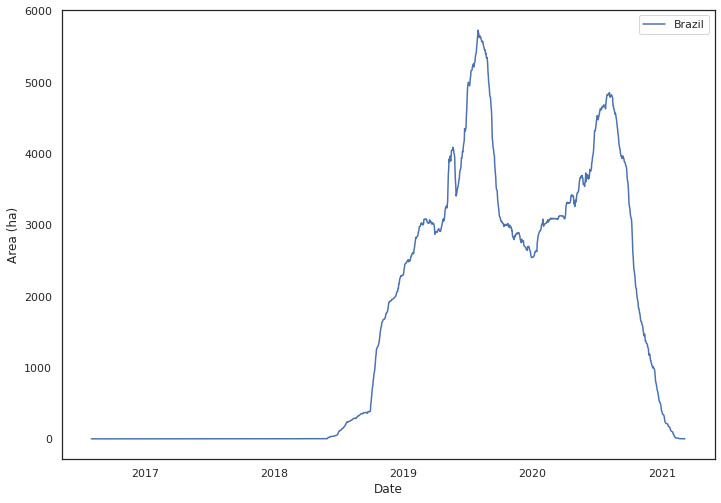

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.lineplot(x='Date', y='Area (ha)', data=df_speed, label='Brazil', marker='', linestyle='-')

In [14]:
df_speed.sort_values('Area (ha)',ascending=False)[0:10]

,Area (ha),day,Date
day,,,
211,5728.004773,211,2019-07-31
212,5695.837449,212,2019-08-01
210,5683.375681,210,2019-07-30
213,5676.338953,213,2019-08-02
216,5648.015671,216,2019-08-05
217,5642.760176,217,2019-08-06
215,5631.651186,215,2019-08-04
218,5626.274939,218,2019-08-07
214,5624.992602,214,2019-08-03


### Biome

In [15]:
df_speed = {}
for biome in validated['Biome'].unique():
    print(f"Calculating daily deforestation for {biome}")
    df_speed[biome] = deforestation_speed(validated[validated['Biome'] == biome])

Calculating daily deforestation for Amazon
Calculating daily deforestation for Cerrado
Calculating daily deforestation for Caatinga
Calculating daily deforestation for Atlantic Forest
Calculating daily deforestation for Pantanal
Calculating daily deforestation for Pampa


<AxesSubplot:xlabel='Date', ylabel='Area (ha)'>

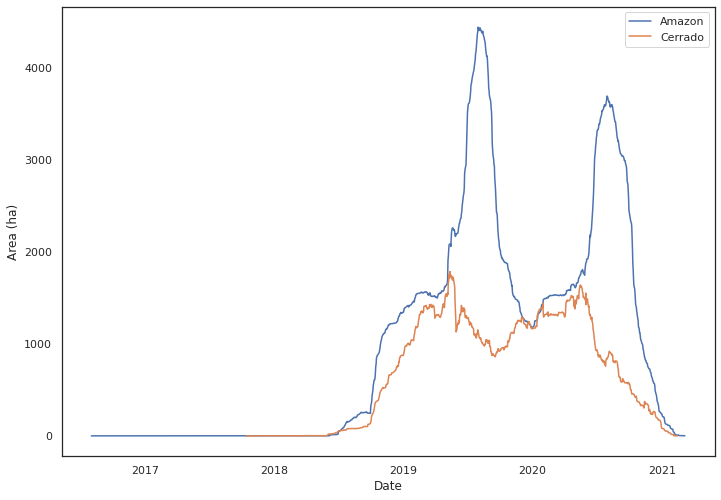

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Amazon'], label='Amazon', marker='', linestyle='-')
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Cerrado'], label='Cerrado', marker='', linestyle='-')

<AxesSubplot:xlabel='Date', ylabel='Area (ha)'>

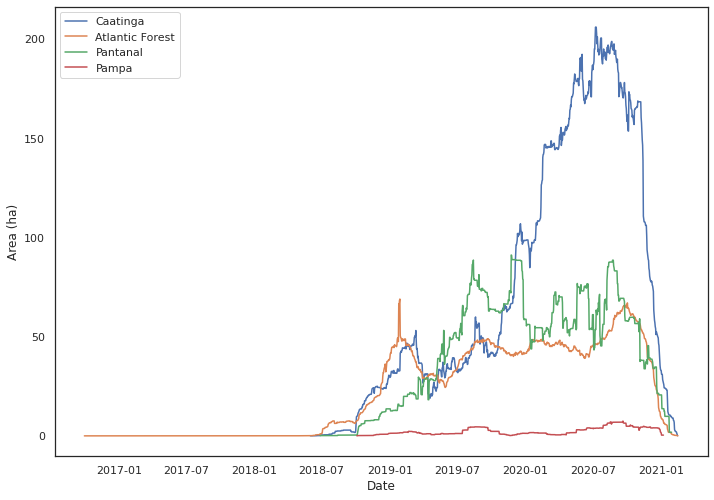

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Caatinga'], label='Caatinga', marker='', linestyle='-')
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Atlantic Forest'], label='Atlantic Forest', marker='', linestyle='-')
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Pantanal'], label='Pantanal', marker='', linestyle='-')
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Pampa'], label='Pampa', marker='', linestyle='-')

In [18]:
for key in df_speed.keys():
    dates = list(df_speed[key].sort_values('Area (ha)',ascending=False)[0:2]['Date'])
    print(f'{key}: {dates}')

Amazon: [Timestamp('2019-07-31 00:00:00'), Timestamp('2019-08-02 00:00:00')]
Cerrado: [Timestamp('2019-05-13 00:00:00'), Timestamp('2019-05-10 00:00:00')]
Caatinga: [Timestamp('2020-07-10 00:00:00'), Timestamp('2020-07-08 00:00:00')]
Atlantic Forest: [Timestamp('2019-01-28 00:00:00'), Timestamp('2019-01-27 00:00:00')]
Pantanal: [Timestamp('2019-11-24 00:00:00'), Timestamp('2019-11-25 00:00:00')]
Pampa: [Timestamp('2020-09-20 00:00:00'), Timestamp('2020-08-19 00:00:00')]
